<a href="https://colab.research.google.com/github/ykitaguchi77/CorneAI/blob/main/Generate_pte_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Stable diffusionのファインチューニングでPteの画像を作成したときの精度評価**

https://www.notion.so/Stable-diffusion-Lora-bc9427134dcd4596badd624720cc365d

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**尤度で評価**

CorneAIに画像入り(100枚)のフォルダを投入し、各クラスの尤度を計算する。今回は正常画像のトレーニングなので、正常と判定される尤度をピックアップし、平均+-標準偏差を算出する

In [4]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_dir = "/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/画像生成/sltphoto_pte"
csv_files = glob.glob(f"{data_dir}/*")
print(csv_files)


#**グラフ描画用**

In [17]:
import os
import pandas as pd
import numpy as np

dfs = []

for file in csv_files:
    df = pd.read_csv(file, encoding='cp932')
    filename = os.path.splitext(os.path.basename(file))[0]
    step = "GroundTruth" if not filename.split("_")[0].isdigit() else int(filename.split("_")[0])
    negative_prompt = "negative" in filename
    df['step'] = step
    df['negative_prompt'] = negative_prompt
    dfs.append(df)

df_combined = pd.concat(dfs, ignore_index=True)

def get_numeric_step(step):
    try:
        return int(step)
    except ValueError:
        return np.inf

df_combined['numeric_step'] = df_combined['step'].apply(get_numeric_step)
df_combined.sort_values(by=['numeric_step', 'negative_prompt'], inplace=True)
df_combined.drop(columns='numeric_step', inplace=True)

grouped_stats_df = df_combined.groupby(['step', 'negative_prompt'])['腫瘍性病変'].agg(['mean', 'std', 'min', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 50), lambda x: np.percentile(x, 75), 'max']).reset_index()
grouped_stats_df.rename(columns={'': 'Q1', '': 'Q2 (Median)', '': 'Q3'}, inplace=True)

grouped_stats_df


,step,negative_prompt,mean,std,min,<lambda_0>,<lambda_1>,<lambda_2>,max
0,150,False,0.264530,0.295098,0.000000,0.001703,0.107959,0.551884,0.874012
1,150,True,0.203198,0.267325,0.000000,0.003874,0.043257,0.320254,0.930539
2,300,False,0.126953,0.246074,0.000000,0.000499,0.002994,0.079358,0.860959
3,300,True,0.226843,0.284731,0.000000,0.002514,0.042743,0.411286,0.924875
4,600,False,0.282529,0.350459,0.000000,0.001606,0.038671,0.667636,0.943877
5,600,True,0.282529,0.350459,0.000000,0.001606,0.038671,0.667636,0.943877
6,1200,False,0.651541,0.375142,0.000000,0.400793,0.852878,0.911854,0.964468
7,1200,True,0.596824,0.378765,0.000000,0.076493,0.807915,0.907630,0.951105
8,2400,False,0.769705,0.274248,0.000000,0.781394,0.883849,0.920486,0.966798
9,2400,True,0.786984,0.290143,0.000325,0.833089,0.909687,0.940624,0.967250


In [ ]:
# import os
# import pandas as pd
# import numpy as np

# # Empty list to store dataframes
# dfs = []

# # Read each csv file, add 'step' and 'negative_prompt' columns based on file name, and append to the list
# for file in csv_files:
#     df = pd.read_csv(file, encoding='cp932')

#     # Get the step number and negative prompt flag from the file name
#     filename = os.path.splitext(os.path.basename(file))[0]

#     if "negative" in filename:
#         step = int(filename.split("_")[0])
#         negative_prompt = True
#     else:
#         try:
#             step = int(filename.split("_")[0])
#             negative_prompt = False
#         except:
#             step = "GroundTruth"
#             negative_prompt = False

#     # Add 'step' and 'negative_prompt' columns
#     df['step'] = step
#     df['negative_prompt'] = negative_prompt

#     dfs.append(df)

# # Concatenate all dataframes
# df_combined = pd.concat(dfs, ignore_index=True)

# # Calculate mean, standard deviation, quartiles, minimum, and maximum of '正常' score for each combination of 'step' and 'negative_prompt'
# grouped_stats_df = df_combined.groupby(['step', 'negative_prompt'])['腫瘍性病変'].agg(['mean', 'std', 'min', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 50), lambda x: np.percentile(x, 75), 'max']).reset_index()

# # Rename the quartiles columns
# grouped_stats_df.rename(columns={'': 'Q1', '': 'Q2 (Median)', '': 'Q3'}, inplace=True)

# # Display the results
# grouped_stats_df


In [ ]:
df_combined

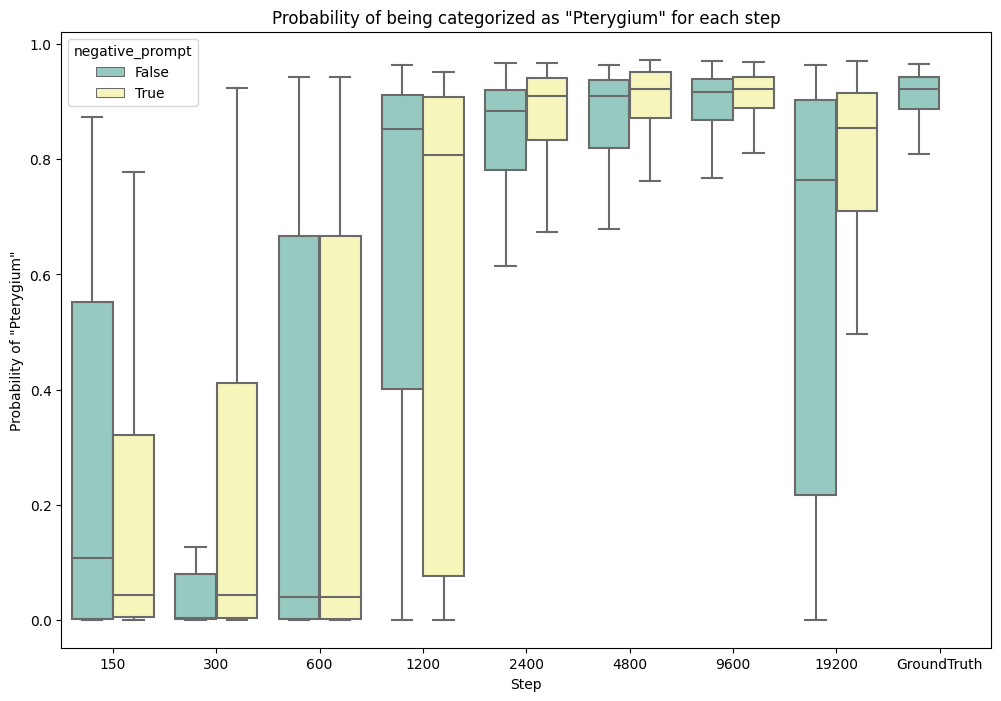

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='step', y='腫瘍性病変', hue='negative_prompt', data=df_combined, palette="Set3", showfliers = False)
plt.title('Probability of being categorized as "Pterygium" for each step')
plt.xlabel('Step')
plt.ylabel('Probability of "Pterygium"')
plt.show()

##**各ステップ数における尤度の比較**

In [20]:
df = df_combined

In [26]:
from scipy.stats import shapiro

# Create a new column combining step and negative_prompt
df['group'] = df['step'].astype(str) + '-' + df['negative_prompt'].astype(str)

# Perform Shapiro-Wilk test for normality for each group
for group in df['group'].unique():
    _, p_value = shapiro(df[df['group'] == group]['腫瘍性病変'])
    print(f'p-value of Shapiro-Wilk test for group {group}: {p_value}')

#　データが正規分布でないのでKruskal-Wallis検定を行う

p-value of Shapiro-Wilk test for group 150-False: 5.515828904734121e-10
p-value of Shapiro-Wilk test for group 150-True: 2.2134715935151483e-11
p-value of Shapiro-Wilk test for group 300-False: 1.3295244074713864e-15
p-value of Shapiro-Wilk test for group 300-True: 7.786817024513226e-11
p-value of Shapiro-Wilk test for group 600-False: 1.0879627927729008e-11
p-value of Shapiro-Wilk test for group 600-True: 1.0879627927729008e-11
p-value of Shapiro-Wilk test for group 1200-False: 4.065973632002423e-13
p-value of Shapiro-Wilk test for group 1200-True: 1.4604116527205946e-11
p-value of Shapiro-Wilk test for group 2400-False: 1.8408212982905757e-14
p-value of Shapiro-Wilk test for group 2400-True: 2.3960567315233373e-15
p-value of Shapiro-Wilk test for group 4800-False: 3.179118150710967e-15
p-value of Shapiro-Wilk test for group 4800-True: 1.145856509576063e-16
p-value of Shapiro-Wilk test for group 9600-False: 3.7536986359068466e-17
p-value of Shapiro-Wilk test for group 9600-True: 9.855

In [28]:
from scipy.stats import kruskal, mannwhitneyu
import numpy as np

# Perform Kruskal-Wallis test
groups = df['group'].unique()
data_by_group = [df[df['group'] == group]['腫瘍性病変'] for group in groups]
H, p_value_kruskal = kruskal(*data_by_group)
print(f'p-value of Kruskal-Wallis test: {p_value_kruskal}')

# Perform Mann-Whitney U tests for each pair of groups
p_values_mannwhitney = pd.DataFrame(np.nan, index=groups, columns=groups)
for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        _, p_value_mannwhitney = mannwhitneyu(df[df['group'] == groups[i]]['腫瘍性病変'], df[df['group'] == groups[j]]['腫瘍性病変'])
        p_values_mannwhitney.loc[groups[i], groups[j]] = p_value_mannwhitney
        p_values_mannwhitney.loc[groups[j], groups[i]] = p_value_mannwhitney

# p>0.05をハイライトして表示
def highlight_cells(val):
    return 'background-color: yellow' if val >= 0.05 else ''

styled_df = p_values_mannwhitney.style.applymap(highlight_cells)
display(styled_df)

p-value of Kruskal-Wallis test: 1.8633126332031674e-165


,150-False,150-True,300-False,300-True,600-False,600-True,1200-False,1200-True,2400-False,2400-True,4800-False,4800-True,9600-False,9600-True,19200-False,19200-True,GroundTruth-False
150-False,nan,0.660946,0.000562,0.669812,0.729530,0.729530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
150-True,0.660946,nan,0.000029,0.962971,0.839289,0.839289,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
300-False,0.000562,0.000029,nan,0.000239,0.000295,0.000295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
300-True,0.669812,0.962971,0.000239,nan,0.716716,0.716716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
600-False,0.729530,0.839289,0.000295,0.716716,nan,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
600-True,0.729530,0.839289,0.000295,0.716716,1.000000,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1200-False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,0.283977,0.047252,0.000237,0.000509,0.000000,0.000001,0.000000,0.115024,0.545351,0.000000
1200-True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.283977,nan,0.000985,0.000001,0.000002,0.000000,0.000000,0.000000,0.590040,0.054026,0.000000
2400-False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047252,0.000985,nan,0.028400,0.043439,0.000029,0.000333,0.000004,0.000162,0.184586,0.000000
2400-True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000237,0.000001,0.028400,nan,0.696743,0.052225,0.360166,0.051052,0.000000,0.002340,0.024933


In [29]:
# Apply Bonferroni correction
num_tests = len(groups) * (len(groups) - 1) / 2
p_values_mannwhitney_corrected = p_values_mannwhitney * num_tests

styled_df = p_values_mannwhitney_corrected.style.applymap(highlight_cells)
display(styled_df)
#p値はそのままで有意水準を下げるのが本来

,150-False,150-True,300-False,300-True,600-False,600-True,1200-False,1200-True,2400-False,2400-True,4800-False,4800-True,9600-False,9600-True,19200-False,19200-True,GroundTruth-False
150-False,nan,89.888597,0.076461,91.094382,99.216119,99.216119,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
150-True,89.888597,nan,0.003908,130.964033,114.143319,114.143319,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
300-False,0.076461,0.003908,nan,0.032482,0.040067,0.040067,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
300-True,91.094382,130.964033,0.032482,nan,97.473415,97.473415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
600-False,99.216119,114.143319,0.040067,97.473415,nan,136.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000026,0.000000,0.000000
600-True,99.216119,114.143319,0.040067,97.473415,136.000000,nan,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000026,0.000000,0.000000
1200-False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,38.620898,6.426301,0.032211,0.069290,0.000008,0.000142,0.000001,15.643305,74.167728,0.000000
1200-True,0.000000,0.000000,0.000000,0.000000,0.000002,0.000002,38.620898,nan,0.133894,0.000193,0.000322,0.000000,0.000000,0.000000,80.245393,7.347561,0.000000
2400-False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.426301,0.133894,nan,3.862357,5.907750,0.003975,0.045298,0.000543,0.021968,25.103748,0.000018
2400-True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032211,0.000193,3.862357,nan,94.757077,7.102632,48.982553,6.943014,0.000029,0.318296,3.390897


In [30]:
# みやすく整形

# Separate the groups into those with negative_prompt = True and those with negative_prompt = False
groups_true = [group for group in groups if 'True' in group and 'GroundTruth' not in group]
groups_false = [group for group in groups if 'False' in group and 'GroundTruth' not in group]

"""
#　事後検定(各群間の有意差を、Mann-Whitney-Uを用いて算出)
"""
# Perform Mann-Whitney U tests for each pair of groups within each set
p_values_mannwhitney_true = pd.DataFrame(np.nan, index=groups_true, columns=groups_true)
for i in range(len(groups_true)):
    for j in range(i+1, len(groups_true)):
        _, p_value_mannwhitney = mannwhitneyu(df[df['group'] == groups_true[i]]['正常'], df[df['group'] == groups_true[j]]['正常'])
        p_values_mannwhitney_true.loc[groups_true[i], groups_true[j]] = p_value_mannwhitney
        p_values_mannwhitney_true.loc[groups_true[j], groups_true[i]] = p_value_mannwhitney

p_values_mannwhitney_false = pd.DataFrame(np.nan, index=groups_false, columns=groups_false)
for i in range(len(groups_false)):
    for j in range(i+1, len(groups_false)):
        _, p_value_mannwhitney = mannwhitneyu(df[df['group'] == groups_false[i]]['正常'], df[df['group'] == groups_false[j]]['正常'])
        p_values_mannwhitney_false.loc[groups_false[i], groups_false[j]] = p_value_mannwhitney
        p_values_mannwhitney_false.loc[groups_false[j], groups_false[i]] = p_value_mannwhitney

# Perform Mann-Whitney U tests for each pair of groups between the two sets
p_values_mannwhitney_between = pd.DataFrame(np.nan, index=groups_true, columns=groups_false)
for i in range(len(groups_true)):
    for j in range(len(groups_false)):
        _, p_value_mannwhitney = mannwhitneyu(df[df['group'] == groups_true[i]]['正常'], df[df['group'] == groups_false[j]]['正常'])
        p_values_mannwhitney_between.loc[groups_true[i], groups_false[j]] = p_value_mannwhitney


styled_df = p_values_mannwhitney_true.style.applymap(highlight_cells)
display(styled_df)

,150-True,300-True,600-True,1200-True,2400-True,4800-True,9600-True,19200-True
150-True,nan,0.249689,0.000002,0.029729,0.262386,0.007388,0.000004,0.002159
300-True,0.249689,nan,0.000000,0.001157,0.914302,0.150307,0.000504,0.058495
600-True,0.000002,0.000000,nan,0.019710,0.000000,0.000000,0.000000,0.000000
1200-True,0.029729,0.001157,0.019710,nan,0.003816,0.000012,0.000000,0.000004
2400-True,0.262386,0.914302,0.000000,0.003816,nan,0.128951,0.000462,0.045427
4800-True,0.007388,0.150307,0.000000,0.000012,0.128951,nan,0.026002,0.546649
9600-True,0.000004,0.000504,0.000000,0.000000,0.000462,0.026002,nan,0.108525
19200-True,0.002159,0.058495,0.000000,0.000004,0.045427,0.546649,0.108525,nan


In [31]:
styled_df = p_values_mannwhitney_false.style.applymap(highlight_cells)
display(styled_df)

,150-False,300-False,600-False,1200-False,2400-False,4800-False,9600-False,19200-False
150-False,nan,0.235792,0.000000,0.020388,0.652385,0.835574,0.102207,0.398338
300-False,0.235792,nan,0.000000,0.202660,0.121640,0.354754,0.007202,0.047775
600-False,0.000000,0.000000,nan,0.000369,0.000000,0.000000,0.000000,0.000000
1200-False,0.020388,0.202660,0.000369,nan,0.008212,0.043433,0.000340,0.003038
2400-False,0.652385,0.121640,0.000000,0.008212,nan,0.479720,0.296336,0.752473
4800-False,0.835574,0.354754,0.000000,0.043433,0.479720,nan,0.074127,0.289472
9600-False,0.102207,0.007202,0.000000,0.000340,0.296336,0.074127,nan,0.460954
19200-False,0.398338,0.047775,0.000000,0.003038,0.752473,0.289472,0.460954,nan


In [33]:
#Negative promptの有無による尤度をMann-Whitney U検定で比較する

styled_df = p_values_mannwhitney_between.style.applymap(highlight_cells)
display(styled_df)


,150-False,300-False,600-False,1200-False,2400-False,4800-False,9600-False,19200-False
150-True,0.056084,0.448553,0.000002,0.556733,0.021620,0.087777,0.000523,0.005749
300-True,0.483180,0.634670,0.000000,0.088399,0.269891,0.647384,0.025429,0.137192
600-True,0.000000,0.000000,1.000000,0.000369,0.000000,0.000000,0.000000,0.000000
1200-True,0.000122,0.005425,0.019710,0.180151,0.000051,0.000472,0.000001,0.000011
2400-True,0.464512,0.704110,0.000000,0.134935,0.234106,0.626067,0.028306,0.137192
4800-True,0.410118,0.050872,0.000000,0.003038,0.765904,0.291349,0.449356,1.000000
9600-True,0.003145,0.000083,0.000000,0.000003,0.014161,0.001669,0.122827,0.026002
19200-True,0.180664,0.017685,0.000000,0.000933,0.407434,0.116563,0.923453,0.546649


In [ ]:
##ちなみに対応のないt-testだとこちら

from scipy.stats import ttest_ind

dataframes = {}
for csv_file in csv_files:
    dataframes[csv_file] = pd.read_csv(csv_file, encoding='cp932')
    print(csv_file)

# Prepare a dictionary to store the results
t_test_results = {}

# Loop over each unique step number
#step_numbers = [150, 300, 600, 1200, 2400, 4800, 9600]
step_numbers = set([int(os.path.splitext(os.path.basename(name))[0]) for name in csv_files if os.path.splitext(os.path.basename(name))[0].isdigit()])
step_numbers = sorted(step_numbers)

for step in step_numbers:
    # Find corresponding dataframe names
    df_name1 = f'{os.path.dirname(csv_file)}/{step}.csv'
    df_name2 = f'{os.path.dirname(csv_file)}/{step}_negative.csv'

    # If both dataframes exist, perform the t-test
    if df_name1 in dataframes and df_name2 in dataframes:
        df1 = dataframes[df_name1]
        df2 = dataframes[df_name2]

        # Perform the t-test on the "正常" column
        t_stat, p_val = ttest_ind(df1["正常"], df2["正常"])
        t_test_results[step] = (t_stat, p_val)

t_test_results #


#**GroundTruthなしのグラフ**

In [38]:
import os
import pandas as pd
import numpy as np

# Empty list to store dataframes
dfs = []

# Read each csv file, add 'step' and 'negative_prompt' columns based on file name, and append to the list
for file in csv_files:
    df = pd.read_csv(file, encoding='cp932')

    # Get the step number and negative prompt flag from the file name
    filename = os.path.splitext(os.path.basename(file))[0]

    if "negative" in filename:
        step = int(filename.split("_")[0])
        negative_prompt = True
    else:
        try:
            step = int(filename.split("_")[0])
            negative_prompt = False
        except:
            pass

    # Add 'step' and 'negative_prompt' columns
    df['step'] = step
    df['negative_prompt'] = negative_prompt

    dfs.append(df)

# Concatenate all dataframes
df_combined = pd.concat(dfs, ignore_index=True)

# Calculate mean, standard deviation, quartiles, minimum, and maximum of '正常' score for each combination of 'step' and 'negative_prompt'
grouped_stats_df = df_combined.groupby(['step', 'negative_prompt'])['腫瘍性病変'].agg(['mean', 'std', 'min', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 50), lambda x: np.percentile(x, 75), 'max']).reset_index()

# Rename the quartiles columns
grouped_stats_df.rename(columns={'': 'Q1', '': 'Q2 (Median)', '': 'Q3'}, inplace=True)

# Display the results
grouped_stats_df

,step,negative_prompt,mean,std,min,<lambda_0>,<lambda_1>,<lambda_2>,max
0,150,False,0.264530,0.295098,0.000000,0.001703,0.107959,0.551884,0.874012
1,150,True,0.203198,0.267325,0.000000,0.003874,0.043257,0.320254,0.930539
2,300,False,0.126953,0.246074,0.000000,0.000499,0.002994,0.079358,0.860959
3,300,True,0.226843,0.284731,0.000000,0.002514,0.042743,0.411286,0.924875
4,600,False,0.282529,0.350459,0.000000,0.001606,0.038671,0.667636,0.943877
5,600,True,0.282529,0.350459,0.000000,0.001606,0.038671,0.667636,0.943877
6,1200,False,0.651541,0.375142,0.000000,0.400793,0.852878,0.911854,0.964468
7,1200,True,0.596824,0.378765,0.000000,0.076493,0.807915,0.907630,0.951105
8,2400,False,0.769705,0.274248,0.000000,0.781394,0.883849,0.920486,0.966798
9,2400,True,0.786984,0.290143,0.000325,0.833089,0.909687,0.940624,0.967250


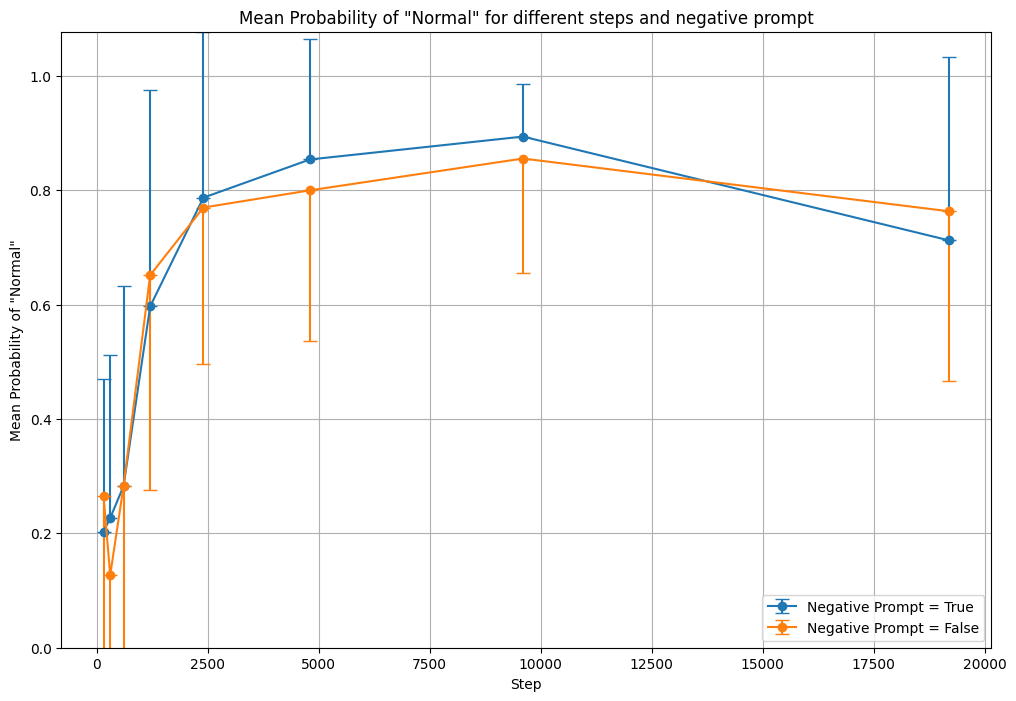

In [39]:
import matplotlib.pyplot as plt

# Separate dataframes for negative_prompt == True and False
df_true = grouped_stats_df[grouped_stats_df['negative_prompt'] == True]
df_false = grouped_stats_df[grouped_stats_df['negative_prompt'] == False]

# Set y limit
ylim_max = max((df_true['mean'] + df_true['std']).max(), (df_false['mean'] + df_false['std']).max())

# Plotting with corrected error bars
plt.figure(figsize=(12, 8))

plt.errorbar(df_true['step'], df_true['mean'], yerr=[[0]*len(df_true['std']), df_true['std']],
             fmt='-o', capsize=5, label='Negative Prompt = True')
plt.errorbar(df_false['step'], df_false['mean'], yerr=[df_false['std'], [0]*len(df_false['std'])],
             fmt='-o', capsize=5, label='Negative Prompt = False')

plt.xlabel('Step')
plt.ylabel('Mean Probability of "Normal"')
plt.ylim(0, ylim_max)
plt.legend()
plt.grid(True)
plt.title('Mean Probability of "Normal" for different steps and negative prompt')
plt.show()

#**FID scoreを用いた画質の評価**

FID for Pytorch
https://github.com/mseitzer/pytorch-fid

FID scoreとは？？
https://data-analytics.fun/2021/12/31/understanding-fid/

In [ ]:
!pip install pytorch_fid


In [ ]:
!unzip "/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/画像生成/generated_normal.zip" -d "/content/generated_normal"

In [ ]:
# Resize images to 299x299 pixcels
from PIL import Image
from tqdm import tqdm
import os

def resize_images(folder_path, size=(299, 299)):
    files_to_resize = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".png") or file.endswith(".jpg"):
                files_to_resize.append(os.path.join(root, file))

    for file_path in tqdm(files_to_resize, desc=f'Resizing images in {folder_path}'):
        img = Image.open(file_path)
        img_resized = img.resize(size)
        img_resized.save(file_path)

# Resize images in the 'true' folder
true_folder = '/content/generated_normal/true'
resize_images(true_folder)

# Resize images in other folders
parent_folder = '/content/generated_normal'
folders = os.listdir(parent_folder)
for folder in folders:
    if folder == 'true':
        continue
    other_folder = os.path.join(parent_folder, folder)
    resize_images(other_folder)

In [ ]:
import os
import pandas as pd

# Path to the folder with the real images
true_images_folder = '/content/generated_normal/true'

# Path to the parent folder of the generated images
parent_folder = '/content/generated_normal'

# Get a list of all folders in the parent folder
folders = os.listdir(parent_folder)

# Create an empty dataframe to store FID scores
fid_scores = pd.DataFrame(columns=['folder', 'fid_score'])

for folder in folders:
    if folder == 'true':
        continue
    other_folder = os.path.join(parent_folder, folder)

    # Calculate the FID score
    fid_score = !python -m pytorch_fid {true_folder} {other_folder}  # Note: replace this with your FID calculation command
    print(fid_score)
    fid_score = float(fid_score[11].split(':')[1].strip())  # Note: adjust this line based on the output of your FID calculation command
    fid_score = round(fid_score, 2) #round FID value to two decimal places

    # Add the FID score to the dataframe
    print(f"{folder}: {fid_score}")
    current_score = pd.DataFrame({'folder': [folder], 'fid_score': [fid_score]})
    fid_scores = pd.concat([fid_scores, current_score], ignore_index=True)

# Print the dataframe
print(fid_scores)

In [ ]:
# Extract the step number and whether the row is negative into new columns
fid_scores['step'] = fid_scores['folder'].str.extract('(\d+)').astype(int)
fid_scores['negative'] = fid_scores['folder'].str.contains('negative')

# Sort by the new columns
fid_scores_sorted = fid_scores.sort_values(['step', 'negative'])

# Reset the index of the sorted DataFrame
fid_scores_sorted = fid_scores_sorted.reset_index(drop=True)

# Print the sorted DataFrame
fid_scores_sorted


In [ ]:
import matplotlib.pyplot as plt

# Create a figure and an axis
fig, ax = plt.subplots()

# For each value of 'negative'
for negative in [True, False]:
    # Select the rows where 'negative' is the current value
    subset = fid_scores_sorted[fid_scores_sorted['negative'] == negative]
    # Plot 'step' vs 'fid_score' for the selected rows
    ax.plot(subset['step'], subset['fid_score'], label=f'negative={negative}')

# Add title and labels
ax.set_title('FID Score by Step Number')
ax.set_xlabel('Step Number')
ax.set_ylabel('FID Score')

# Add a legend
ax.legend()

# Display the plot
plt.show()


#**人力評価用データセットの作成**

In [ ]:
!unzip "/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/画像生成/generated_normal.zip" -d "/content/generated_normal"